In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('C:\\Users\\Owner\\Downloads\\Public_Libraries.csv')

## Data Cleaning & Preprocessing

First, we look at the data types, the presence of null values, and a snapshot of the data

In [22]:
df.head()

,Fiscal Year,Library,County,Principal Public?,AENGLC Rank,Population of Service Area,Total Library Visits,Library Visits Per Capita Served,Total Registered Borrowers,Percent of Residents with Library Cards,Registrations Per Capita Served,Reference Questions,Reference Questions Per Capita Served,Total Circulation,Circulation Per Capita Served,Total Programs (Synchronous + Prerecorded),Total Program Attendance & Views,Total Program Attendance & Views Per Capita Served,Use of Public Internet Computers,Total Collection,Collection Per Capita Served,Total Operating Income,Operating Income Per Capita,Town Tax Appropriation for Library,Tax Appropriation Per Capita Served,Library Materials Expenditures,Wages & Salaries Expenditures,Operating Expenditures,Operating Expenditures Per Capita
0,1996,Andover,Tolland,P,109.0,2815.0,15000.0,5.3,1313.0,0.47,NaN,499.0,0.2,17028.0,5.6,117.0,860.0,0.3,NaN,15285.0,5.4,56300.0,20.00,52915.0,18.80,10073.0,30996.0,44290.0,15.7
1,1996,Ansonia,New Haven,P,158.0,17825.0,91756.0,5.1,6952.0,0.39,NaN,NaN,NaN,71301.0,3.5,153.0,4525.0,0.3,NaN,63685.0,3.6,320679.0,17.99,323503.0,18.15,45874.0,201621.0,270658.0,15.2
2,1996,Ashford-Babcock,Windham,P,131.0,3969.0,8665.0,2.2,1360.0,0.34,NaN,207.0,0.1,34574.0,8.6,22.0,780.0,0.2,NaN,23818.0,6.0,111699.0,28.14,106713.0,26.89,11508.0,62295.0,82769.0,20.9
3,1996,Avon,Hartford,P,19.0,14143.0,162893.0,11.5,8808.0,0.62,NaN,15283.0,1.1,226137.0,11.9,345.0,9501.0,0.7,NaN,74903.0,5.3,685678.0,48.48,602831.0,42.62,92711.0,340400.0,516583.0,36.5
4,1996,Beacon Falls,New Haven,P,129.0,5351.0,7000.0,1.3,1379.0,0.26,NaN,400.0,0.1,8880.0,1.7,22.0,223.0,0.0,NaN,10042.0,1.9,40806.0,7.63,39256.0,7.34,4298.0,21585.0,39165.0,7.3


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 29 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Fiscal Year                                         5105 non-null   int64  
 1   Library                                             5105 non-null   object 
 2   County                                              5105 non-null   object 
 3   Principal Public?                                   5105 non-null   object 
 4   AENGLC Rank                                         4988 non-null   float64
 5   Population of Service Area                          4642 non-null   float64
 6   Total Library Visits                                4886 non-null   float64
 7   Library Visits Per Capita Served                    4870 non-null   float64
 8   Total Registered Borrowers                          5000 non-null   float64
 9

In [18]:
df.isnull().sum()

Fiscal Year                                              0
Library                                                  0
County                                                   0
Principal Public?                                        0
AENGLC Rank                                            117
Population of Service Area                             463
Total Library Visits                                   219
Library Visits Per Capita Served                       235
Total Registered Borrowers                             105
Percent of Residents with Library Cards                119
Registrations Per Capita Served                       5105
Reference Questions                                    396
Reference Questions Per Capita Served                  425
Total Circulation                                       53
Circulation Per Capita Served                           70
Total Programs (Synchronous + Prerecorded)             168
Total Program Attendance & Views                       1

In [30]:
print("The different counties and number of libraries\n", df.groupby(['County'], as_index=False).agg({'Library':'nunique'}))

The different counties and number of libraries
        County  Library
0   Fairfield       30
1    Hartford       39
2  Litchfield       30
3   Middlesex       18
4   New Haven       31
5  New London       21
6     Tolland       13
7     Windham       26


In [32]:
#Dropping columns with high null values
df = df.drop(columns=['Use of Public Internet Computers','Registrations Per Capita Served'])

In [34]:
#Filling null values for other columns using mean values from each county
for col in df.columns:
    if df[col].dtype != object:
        df['County Avg'] = df.groupby('County')[col].transform('mean').round()
        df[col] = df[col].fillna(df['County Avg'])

In [36]:
df.isnull().sum()

Fiscal Year                                           0
Library                                               0
County                                                0
Principal Public?                                     0
AENGLC Rank                                           0
Population of Service Area                            0
Total Library Visits                                  0
Library Visits Per Capita Served                      0
Total Registered Borrowers                            0
Percent of Residents with Library Cards               0
Reference Questions                                   0
Reference Questions Per Capita Served                 0
Total Circulation                                     0
Circulation Per Capita Served                         0
Total Programs (Synchronous + Prerecorded)            0
Total Program Attendance & Views                      0
Total Program Attendance & Views Per Capita Served    0
Total Collection                                

In [38]:
print(df['Fiscal Year'].unique().tolist())

[1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [40]:
#Create new useful features
df['Visits per Borrower'] = df['Total Library Visits'] / df['Total Registered Borrowers']
df['Expenditure Efficiency'] = df['Total Circulation'] / df['Operating Expenditures']
df['Program Engagement Ratio'] = df['Total Program Attendance & Views'] / df['Total Programs (Synchronous + Prerecorded)']

## EDA

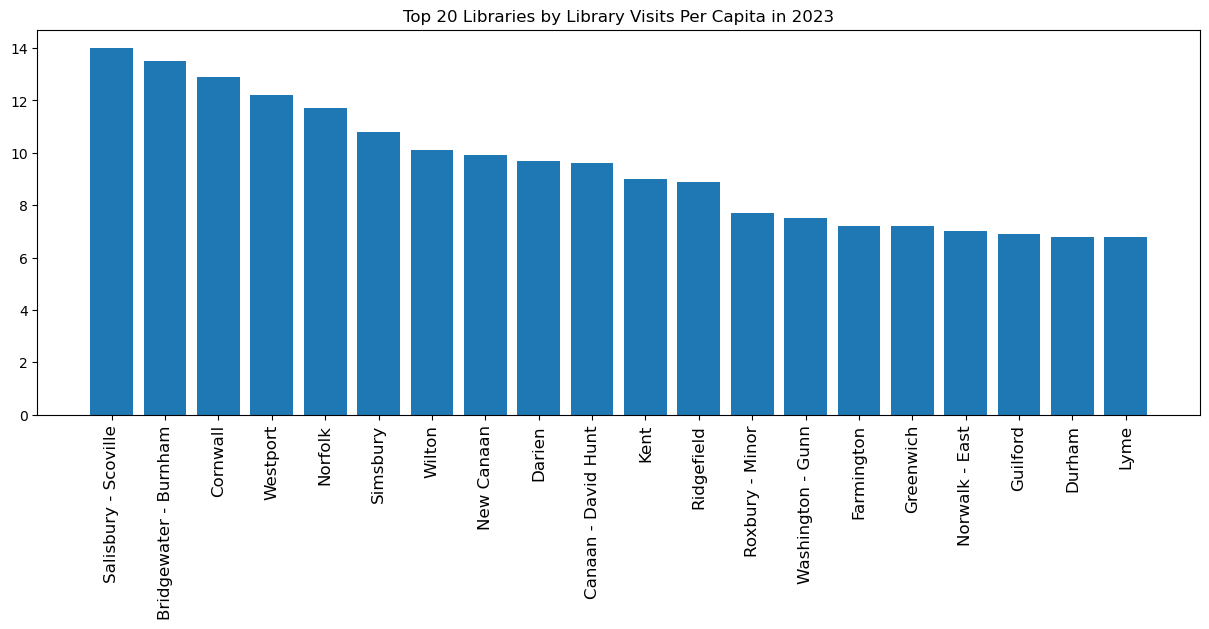

In [45]:
df_copy = df[df['Fiscal Year']==2023].copy()\
.sort_values('Library Visits Per Capita Served', ascending=False).head(20)

x = df_copy['Library']
y = df_copy['Library Visits Per Capita Served']

plt.figure(figsize=(15,5))
plt.bar(x= x, height= y)
plt.xticks(rotation=90, fontsize=12)
plt.title('Top 20 Libraries by Library Visits Per Capita in 2023')
plt.show()

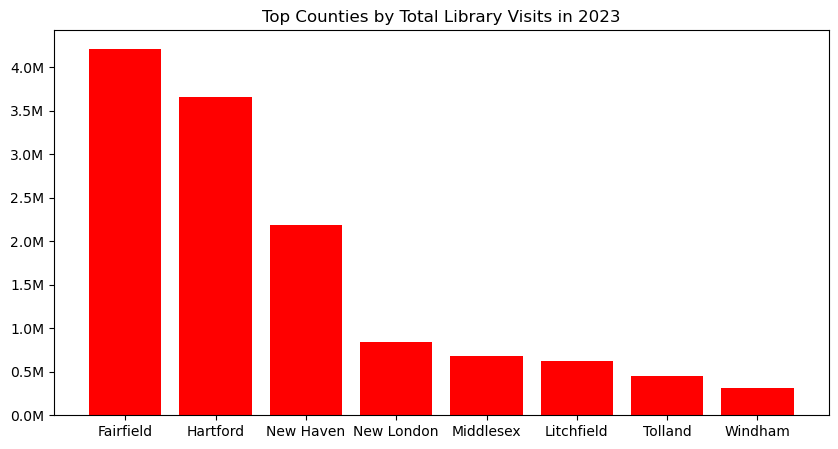

In [47]:
df_copy = df[df['Fiscal Year']==2023].groupby('County', as_index=False).agg({'Total Library Visits':'sum'}).\
sort_values('Total Library Visits', ascending=False)

x = df_copy['County']
y = df_copy['Total Library Visits']

plt.figure(figsize=(10,5))
plt.bar(x= x, height= y, color='red')

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))


plt.xticks(fontsize=10)
plt.title('Top Counties by Total Library Visits in 2023')
plt.show()

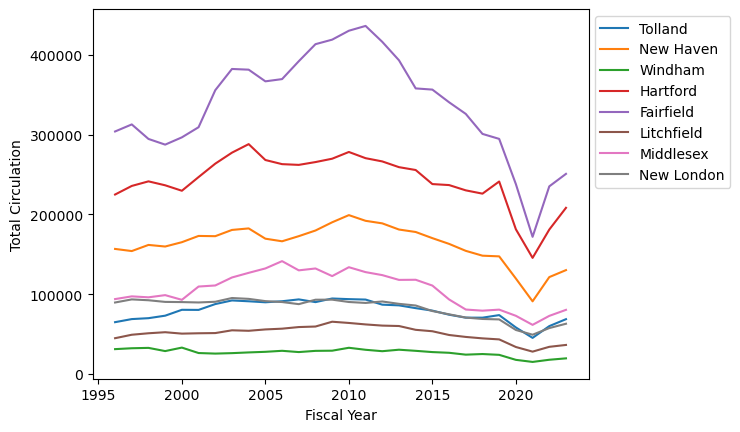

In [69]:
sns.lineplot(x='Fiscal Year', y='Total Circulation', data=df, errorbar=None, hue='County')
plt.legend(bbox_to_anchor=(1.3,1),loc='upper right')

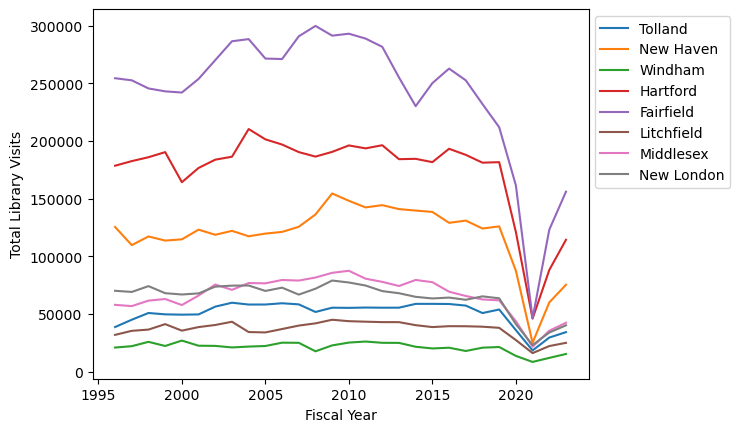

In [71]:
sns.lineplot(x='Fiscal Year', y='Total Library Visits', data=df, errorbar=None, hue='County')
plt.legend(bbox_to_anchor=(1.3,1),loc='upper right')

From the above figures, we can conclude that counties **Fairfield, Hartford, and New Haven** have historically and most recently been with the most library visits and home to most circulations.
There are dips in visits for each county in the Covid years, the most affected by these dips were the top counties.

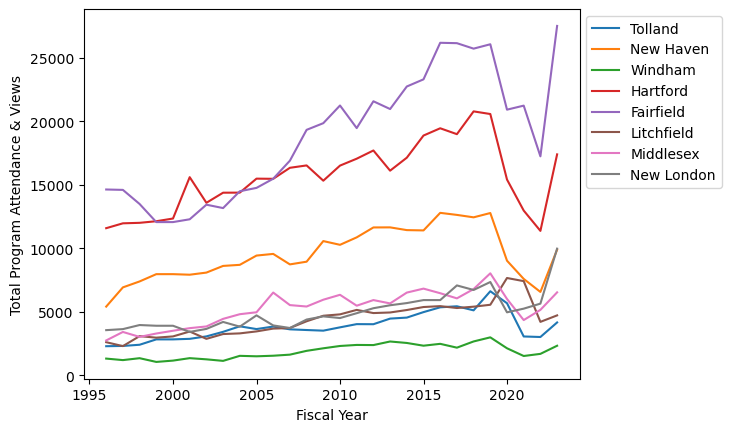

In [115]:
sns.lineplot(x='Fiscal Year', y='Total Program Attendance & Views', data=df, errorbar=None, hue='County')
plt.legend(bbox_to_anchor=(1.3,1),loc='upper right')
plt.show()

Barring the Covid dip, there has been an upward trend in the total program attendance & views for almost all counties. **Fairfield** county saw its highest attendance & views in 2023.

In [97]:
df.columns

Index(['Fiscal Year', 'Library', 'County', 'Principal Public?', 'AENGLC Rank',
       'Population of Service Area', 'Total Library Visits',
       'Library Visits Per Capita Served', 'Total Registered Borrowers',
       'Percent of Residents with Library Cards', 'Reference Questions',
       'Reference Questions Per Capita Served', 'Total Circulation',
       'Circulation Per Capita Served',
       'Total Programs (Synchronous + Prerecorded)',
       'Total Program Attendance & Views',
       'Total Program Attendance & Views Per Capita Served',
       'Total Collection', 'Collection Per Capita Served',
       'Total Operating Income', 'Operating Income Per Capita',
       'Town Tax Appropriation for Library',
       'Tax Appropriation Per Capita Served', 'Library Materials Expenditures',
       'Wages & Salaries Expenditures', 'Operating Expenditures',
       'Operating Expenditures Per Capita', 'County Avg',
       'Visits per Borrower', 'Expenditure Efficiency',
       'Program Enga

Checking correlation between variables


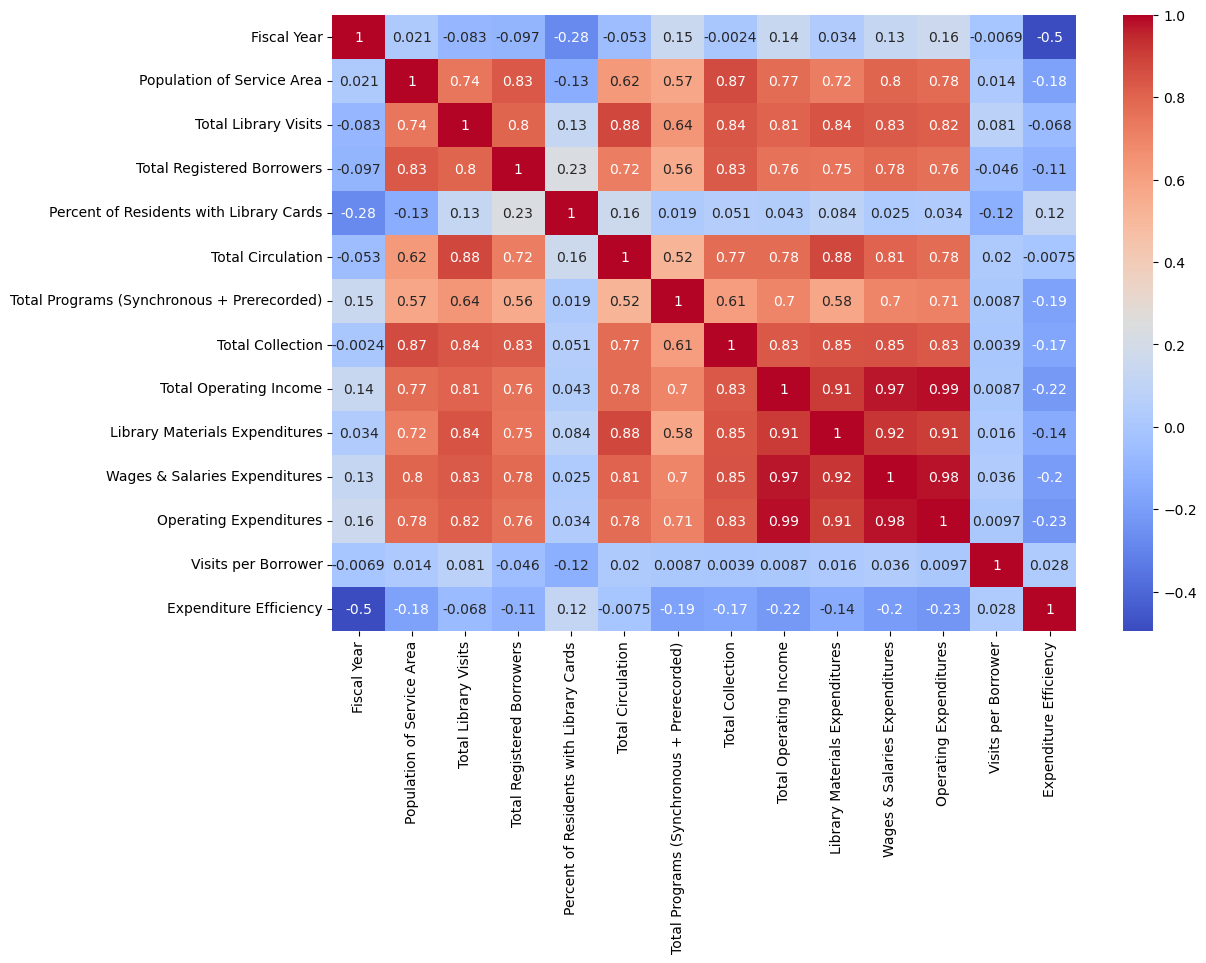

In [105]:
print('Checking correlation between variables')
cols = ['Fiscal Year', 'Library', 'County','Population of Service Area', 'Total Library Visits',
        'Total Registered Borrowers','Percent of Residents with Library Cards', 'Total Circulation',
        'Total Programs (Synchronous + Prerecorded)', 'Total Collection', 'Total Operating Income',
        'Library Materials Expenditures','Wages & Salaries Expenditures', 'Operating Expenditures',
         'Visits per Borrower', 'Expenditure Efficiency']
plt.figure(figsize=(12,8))
sns.heatmap(df[cols].corr(numeric_only=True), cmap="coolwarm", annot=True)
plt.show()

## Modeling

We will build a regression model that predicts Library Visits

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, silhouette_score
import numpy as np

In [157]:
X = df[['Population of Service Area','Operating Expenditures','Total Collection','Total Registered Borrowers','Total Circulation','Total Operating Income']]
y = df['Total Library Visits']

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression().fit(X_train, y_train)

In [161]:
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.8697881751708914
MAE: 29056.37127451773
RMSE: 49737.03390686124


In [163]:
df['Total Library Visits'].mean()

108669.21723800196

The regression model achieved an R² of 0.87, explaining 87% of the variance in library circulation. The model’s average error is about 29,000 circulations, or 27% of the average circulation level. The RMSE of 49,737 (46% of the mean) indicates that while most predictions are reasonably close, a subset of libraries show much larger deviations. This suggests the model is effective at capturing broad trends but could benefit from incorporating additional predictors (e.g., digital resource usage, demographic diversity, or urban vs. rural distinctions) to reduce high-error cases

We can also use clusters to group together similar libraries

In [218]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_scaled)
df['Cluster'] = kmeans.labels_

In [220]:
sil_score = silhouette_score(X_scaled, kmeans.labels_)
print("Silhouette Score:", sil_score)


Silhouette Score: 0.688325420158019


The clustering model achieved a silhouette score of 0.68 with k=2, which indicates well-separated and meaningful clusters. This suggests that libraries naturally fall into two distinct groups, likely representing high-resource/high-usage libraries versus lower-resource/usage libraries. While additional clusters could be explored, the strong separation at k=2 highlights two dominant archetypes that can inform funding and resource allocation decisions.